# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 3-13 rely on your question 1 answer.

In [1]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.  `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [2]:
def answer_one():
    # Read the excel Energy file
    Energy = pd.read_excel(io='assets/Energy Indicators.xls', sheet_name='Energy', header=16, skipfooter=38)
    
    #Dropped the useless columns and rows
    Energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
    Energy.drop(0, axis=0, inplace=True)
    
    # Renamed the columns
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable'}, inplace=True)
    
    # Replaced the ... with NaN and converted the Energy Supply to Gigajoules
    Energy.loc[Energy['Energy Supply'] == '...', ['Energy Supply', 'Energy Supply per capita']] = np.nan
    Energy['Energy Supply'] = Energy['Energy Supply'].apply(lambda x: x*1000000)
    
    # Took out the numbers from the Country column
    pattern = '([A-Za-z, ]*)'
    Energy['Country'] = Energy['Country'].str.extract(pattern)
    Energy['Country'] = Energy['Country'].str.strip()
    
    # Change the names of the countries
    Energy['Country'] = Energy['Country'].replace(['Republic of Korea', 'United States of America', 
                                                   'United Kingdom of Great Britain and Northern Ireland', 
                                                   'China, Hong Kong Special Administrative Region'], 
                                                  ['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])
    
    
    # Read the csv World Bank file
    GDP = pd.read_csv('assets/world_bank.csv', header=2)
    
    # Renamed countries
    GDP['Country Name'] = GDP['Country Name'].replace(['Korea, Rep.', 'Iran, Islamic Rep.', 'Hong Kong SAR, China'],
                                                     ['South Korea', 'Iran', 'Hong Kong'])
    
    # Renamed the column Contry Name
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
    
    
    # Read the excel Scimago file
    ScimEn = pd.read_excel(io='assets/scimagojr-3.xlsx')
    
    # Dropped useless columns
    ScimEn.drop('Region', axis=1, inplace=True)
    
    # Merge the three datasets
    df = ScimEn.merge(Energy, on='Country').merge(GDP, on='Country')
    
    # Get only the top 15 ranked Countries
    df = df[df['Rank'] <= 15]
    
    # Filter columns to keep
    colums_to_keep = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 
                       'H index', 'Energy Supply', 'Energy Supply per capita', '% Renewable', '2006', '2007', '2008', 
                       '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    df = df[colums_to_keep]
    
    # Set Country as an index
    df = df.set_index('Country')
    
    # Sort dataset
    df = df.sort_values(by=['Rank'])
    return df

In [3]:
df = answer_one()
df.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,273437,272374,2336764,1615239,8.55,245,1.271910e+11,93,19.7549,2.752132e+12,3.550343e+12,4.594307e+12,5.101703e+12,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13
United States,2,175891,172431,2230544,724472,12.68,363,9.083800e+10,286,11.571,1.381461e+13,1.445186e+13,1.471284e+13,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.822470e+13
India,3,55082,53775,463165,162944,8.41,181,3.319500e+10,26,14.9691,9.402599e+11,1.216735e+12,1.198896e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12
Japan,4,50523,50065,488062,119930,9.66,193,1.898400e+10,149,10.2328,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12
United Kingdom,5,43389,42284,615670,111290,14.19,226,7.920000e+09,124,10.6005,2.713750e+12,3.100882e+12,2.922667e+12,2.410910e+12,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12
Germany,6,38739,38013,433148,95145,11.18,196,1.326100e+10,165,17.9015,2.992197e+12,3.421229e+12,3.730028e+12,3.397791e+12,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.356236e+12
Russian Federation,7,36735,36560,115938,54993,3.16,90,3.070900e+10,214,17.2887,9.899305e+11,1.299706e+12,1.660846e+12,1.222644e+12,1.524917e+12,2.045926e+12,2.208296e+12,2.292473e+12,2.059242e+12,1.363481e+12
Canada,8,33472,32863,568080,100953,16.97,227,1.043100e+10,296,61.9454,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.828689e+12,1.847209e+12,1.803533e+12,1.556130e+12
Italy,9,27983,26940,352993,87828,12.61,166,6.530000e+09,109,33.6672,1.947920e+12,2.210293e+12,2.398857e+12,2.191242e+12,2.134018e+12,2.291991e+12,2.087077e+12,2.141315e+12,2.159134e+12,1.835899e+12


In [4]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"

In [5]:
# Cell for autograder.

### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [6]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [7]:
def answer_two():
    # Read the excel Energy file
    Energy = pd.read_excel(io='assets/Energy Indicators.xls', sheet_name='Energy', header=16, skipfooter=38)
    
    #Dropped the useless columns and rows
    Energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
    Energy.drop(0, axis=0, inplace=True)
    
    # Renamed the columns
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable'}, inplace=True)
    
    # Replaced the ... with NaN and converted the Energy Supply to Gigajoules
    Energy.loc[Energy['Energy Supply'] == '...', ['Energy Supply', 'Energy Supply per capita']] = np.nan
    Energy['Energy Supply'] = Energy['Energy Supply'].apply(lambda x: x*1000000)
    
    # Took out the numbers from the Country column
    pattern = '([A-Za-z, ]*)'
    Energy['Country'] = Energy['Country'].str.extract(pattern)
    Energy['Country'] = Energy['Country'].str.strip()
    
    # Change the names of the countries
    Energy['Country'] = Energy['Country'].replace(['Republic of Korea', 'United States of America', 
                                                   'United Kingdom of Great Britain and Northern Ireland', 
                                                   'China, Hong Kong Special Administrative Region'], 
                                                  ['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])
    
    
    # Read the csv World Bank file
    GDP = pd.read_csv('assets/world_bank.csv', header=2)
    
    # Renamed countries
    GDP['Country Name'] = GDP['Country Name'].replace(['Korea, Rep.', 'Iran, Islamic Rep.', 'Hong Kong SAR, China'],
                                                     ['South Korea', 'Iran', 'Hong Kong'])
    
    # Renamed the column Contry Name
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
    
    
    # Read the excel Scimago file
    ScimEn = pd.read_excel(io='assets/scimagojr-3.xlsx')
    
    # Dropped useless columns
    ScimEn.drop('Region', axis=1, inplace=True)
    
    
    total = (len(Energy) + len(GDP) + len(ScimEn) - len(Energy.merge(GDP, on='Country'))
             - len(GDP.merge(ScimEn, on='Country')) - len(Energy.merge(ScimEn, on='Country')))

    return total

In [8]:
df = answer_two()
df

152

In [9]:
assert type(answer_two()) == int, "Q2: You should return an int number!"

### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [10]:
def answer_three():
    df = answer_one()
    
    def mean_GDP(row):
        data = row[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
        row['mean'] = np.mean(data)
        return row
    
    avgGDP = df.apply(mean_GDP, axis='columns').sort_values(by='mean', ascending=False)['mean']

    return avgGDP

In [11]:
df = answer_three()
df

Country
United States         1.566966e+13
China                 6.927702e+12
Japan                 5.177131e+12
Germany               3.518225e+12
United Kingdom        2.776607e+12
France                2.687371e+12
Italy                 2.139775e+12
Brazil                1.988885e+12
Russian Federation    1.666746e+12
Canada                1.613835e+12
India                 1.602352e+12
Spain                 1.398587e+12
South Korea           1.221372e+12
Australia             1.206526e+12
Iran                  4.389286e+11
Name: mean, dtype: float64

In [12]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [13]:
def answer_four():
    df = answer_one()
    
    def mean_GDP(row):
        data = row[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
        row['mean'] = np.mean(data)
        return row
    
    sixth_country = df.apply(mean_GDP, axis='columns').sort_values(by='mean', ascending=False).iloc[5]
    difference = sixth_country['2015'] - sixth_country['2006']
    
    return difference

In [14]:
df = answer_four()
df

119614244263.37988

### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [15]:
def answer_five():
    df = answer_one()
    avgEnergySupplyPerCapita = df['Energy Supply per capita'].mean()
    return avgEnergySupplyPerCapita

In [16]:
df = answer_five()
df

157.6

### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [17]:
def answer_six():
    df = answer_one()
    df = df.reset_index()
    highest_renewable = (df[df['% Renewable'] == df['% Renewable'].max()]['Country'].item(), df['% Renewable'].max())
    return highest_renewable

In [18]:
df = answer_six()
df

('Brazil', 69.64803)

In [19]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [20]:
def answer_seven():
    df = answer_one()
    df['Citations Ratio'] = df['Self-citations']/df['Citations']
    df = df.reset_index()
    highest_citations_ratio = (df[df['Citations Ratio'] == df['Citations Ratio'].max()]['Country'].item(), 
                               df['Citations Ratio'].max())
    return highest_citations_ratio

In [21]:
df = answer_seven()
df

('China', 0.6912289816173135)

In [22]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [23]:
def answer_eight():
    df = answer_one()
    df['Population'] = df['Energy Supply']/df['Energy Supply per capita']
    df = df.reset_index().sort_values(by='Population', ascending=False)
    third_populous_country = df.iloc[2]['Country']
    return third_populous_country

In [24]:
df = answer_eight()
df

'United States'

In [25]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [26]:
def answer_nine():
    df = answer_one()
    df['Population'] = df['Energy Supply']/df['Energy Supply per capita']
    df['Citable docs per Capita'] = df['Citable documents']/df['Population']
    df['Citable docs per Capita'] = df['Citable docs per Capita'].astype('float64')
    df['Energy Supply per capita'] = df['Energy Supply per capita'].astype('float64')
    df_corr = df[['Citable docs per Capita', 'Energy Supply per capita']]
    correlation = df_corr['Citable docs per Capita'].corr(df_corr['Energy Supply per capita'])
    return correlation

In [27]:
df = answer_nine()
df

0.7434709127726777

In [28]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per capita', kind='scatter', xlim=[0, 0.0006])

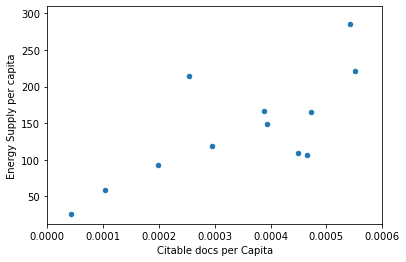

In [29]:
df = plot9()
df

In [30]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [31]:
def answer_ten():
    df = answer_one()
    df['% Renewable Average'] = np.mean(df['% Renewable'])
    df['HighRenew'] = np.where(df['% Renewable'] >= df['% Renewable Average'], 1, 0)
    HighRenew = df['HighRenew']
    return HighRenew

In [32]:
df = answer_ten()
df

Country
China                 0
United States         0
India                 0
Japan                 0
United Kingdom        0
Germany               0
Russian Federation    0
Canada                1
Italy                 1
South Korea           0
France                0
Iran                  0
Spain                 1
Brazil                1
Australia             0
Name: HighRenew, dtype: int32

In [33]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [34]:
def answer_eleven():
    df = answer_one()
    df['Population'] = df['Energy Supply']/df['Energy Supply per capita']
    df['Population'] = df['Population'].astype('float64')
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    df_continent 
    
    df['Continent'] = df_continent
    df = df.reset_index()
    df = df.groupby('Continent').agg({'Population':(np.size, np.sum, np.mean, np.std)})
    return df

In [35]:
df = answer_eleven()
df

Population                                
                         size           sum          mean std
Continent                                                    
Australia                 1.0  2.059153e+08  2.059153e+08 NaN
Brazil                    1.0  2.331602e+07  2.331602e+07 NaN
Canada                    1.0  8.036970e+07  8.036970e+07 NaN
China                     1.0  1.367645e+09  1.367645e+09 NaN
France                    1.0  5.990826e+07  5.990826e+07 NaN
Germany                   1.0  1.435000e+08  1.435000e+08 NaN
India                     1.0  3.523986e+07  3.523986e+07 NaN
Iran                      1.0  4.644340e+07  4.644340e+07 NaN
Italy                     1.0  6.383735e+07  6.383735e+07 NaN
Japan                     1.0  1.276731e+09  1.276731e+09 NaN
Russian Federation        1.0  6.387097e+07  6.387097e+07 NaN
South Korea               1.0  4.980543e+07  4.980543e+07 NaN
Spain                     1.0  7.707563e+07  7.707563e+07 NaN
United Kingdom            1.0  1.274094e+08  1.274094e+08 NaN
United States             1.0  3.176154e+08  3.176154e+08 NaN

In [36]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


AssertionError: Q11: Wrong row numbers!

### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [ ]:
def answer_twelve():
    df = answer_one()
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
    df['Continent'] = ContinentDict
    df = df.reset_index()
    
    def create_renewable_category(percent):
        if (percent >= 0) & (percent <= 14):
            return 'r14'
        if (percent > 14) & (percent <= 28):
            return 'r28'
        if (percent > 28) & (percent <= 42):
            return 'r42'
        if (percent > 42) & (percent <= 56):
            return 'r56'
        else:
            return 'r70'
    
    
    df['Renewable Rank'] = df['% Renewable'].apply(lambda x: create_renewable_category(x))
    df = df.groupby(['Continent', 'Renewable Rank']).agg({'Country':(np.size)})
    df = df.squeeze()
    return df

In [ ]:
df = answer_twelve()
df

In [ ]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [ ]:
def answer_thirteen():
    df = answer_one()
    PopEst = df['Energy Supply']/df['Energy Supply per capita']
    PopEst = PopEst.apply(lambda x: "{:,}".format(x))
    return PopEst

In [ ]:
df = answer_thirteen()
df

In [ ]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
plot_optional()